# Examen Intelligence Artificielle

## Problème

Utiliser le jeu de données qui vous est fournie pour prédire en fonction de certaines variables si oui ou non un étudiant appartient a une université privé ou public.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import linregress
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter("ignore")

## 1) Chargment des données

In [2]:
full_data = pd.read_csv('data.csv')
full_data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 2) Exploration des données

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [4]:
full_data.describe().T # transposée

,count,mean,std,min,25%,50%,75%,max
apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
f_undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
p_undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
room_board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [5]:
full_data.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

### Distribution du target

<Axes: xlabel='private', ylabel='Count'>

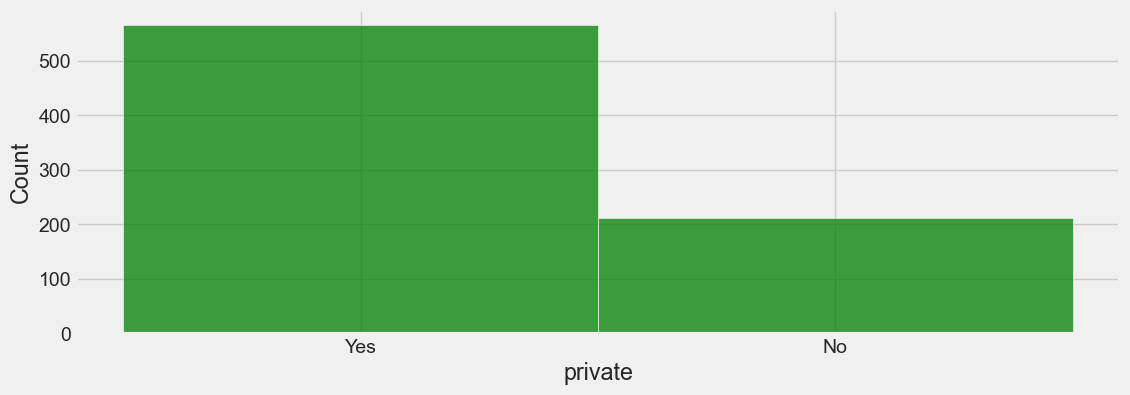

In [6]:
plt.figure(figsize=(12,4))
sns.histplot(full_data, x='private', color='green')

### Distribution des variables

In [7]:
TARGET = 'private'

['apps', 'accept', 'enroll', 'top10perc', 'top25perc', 'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books', 'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend', 'grad_rate']
6 17


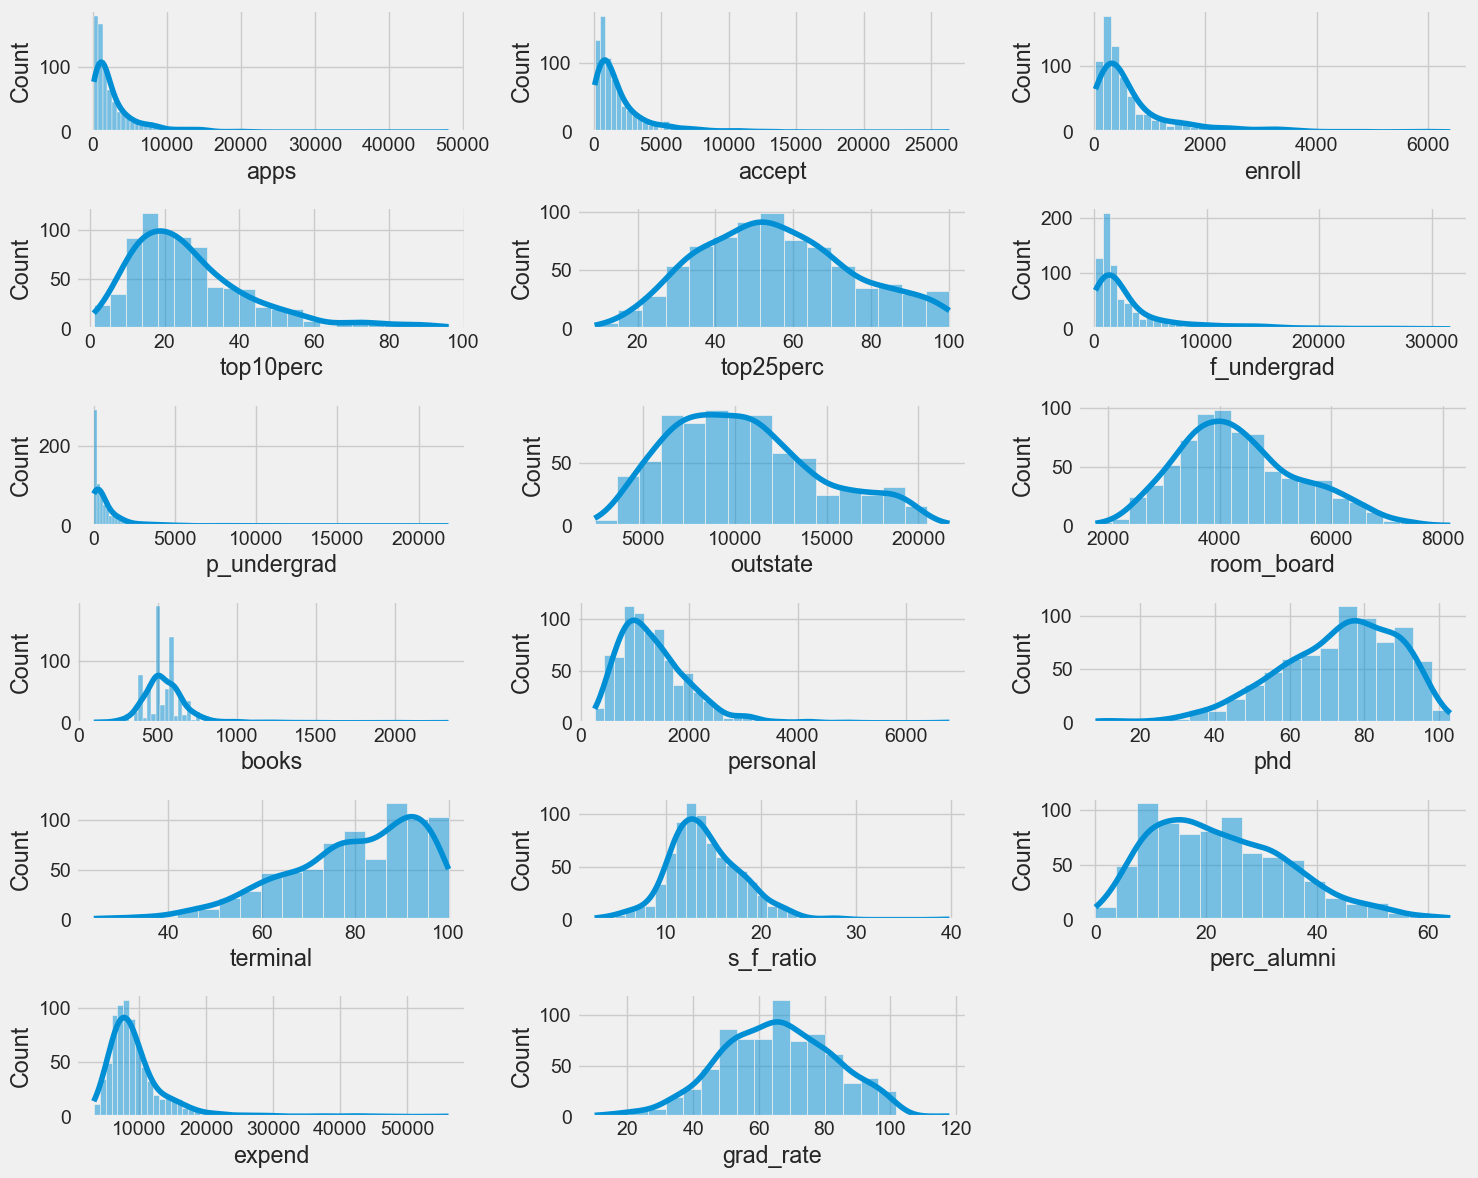

In [8]:
features = list(full_data.drop(columns = [TARGET]).select_dtypes(include = ['int64', 'float64']).columns)
print(features)

n_plots = len(features)
n_cols = 3
n_rows = math.ceil(n_plots/n_cols)
print(n_rows, n_plots)
plt.figure(figsize=(15,12))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(full_data[feature], kde=True)
    plt.tight_layout()
    plt.plot()

nous voyons que nos données ont presque tous une distribution de skewed(assymétrique), nous resolvons cela en applicant le MinMaxscaler

### Valeurs Aberrantes

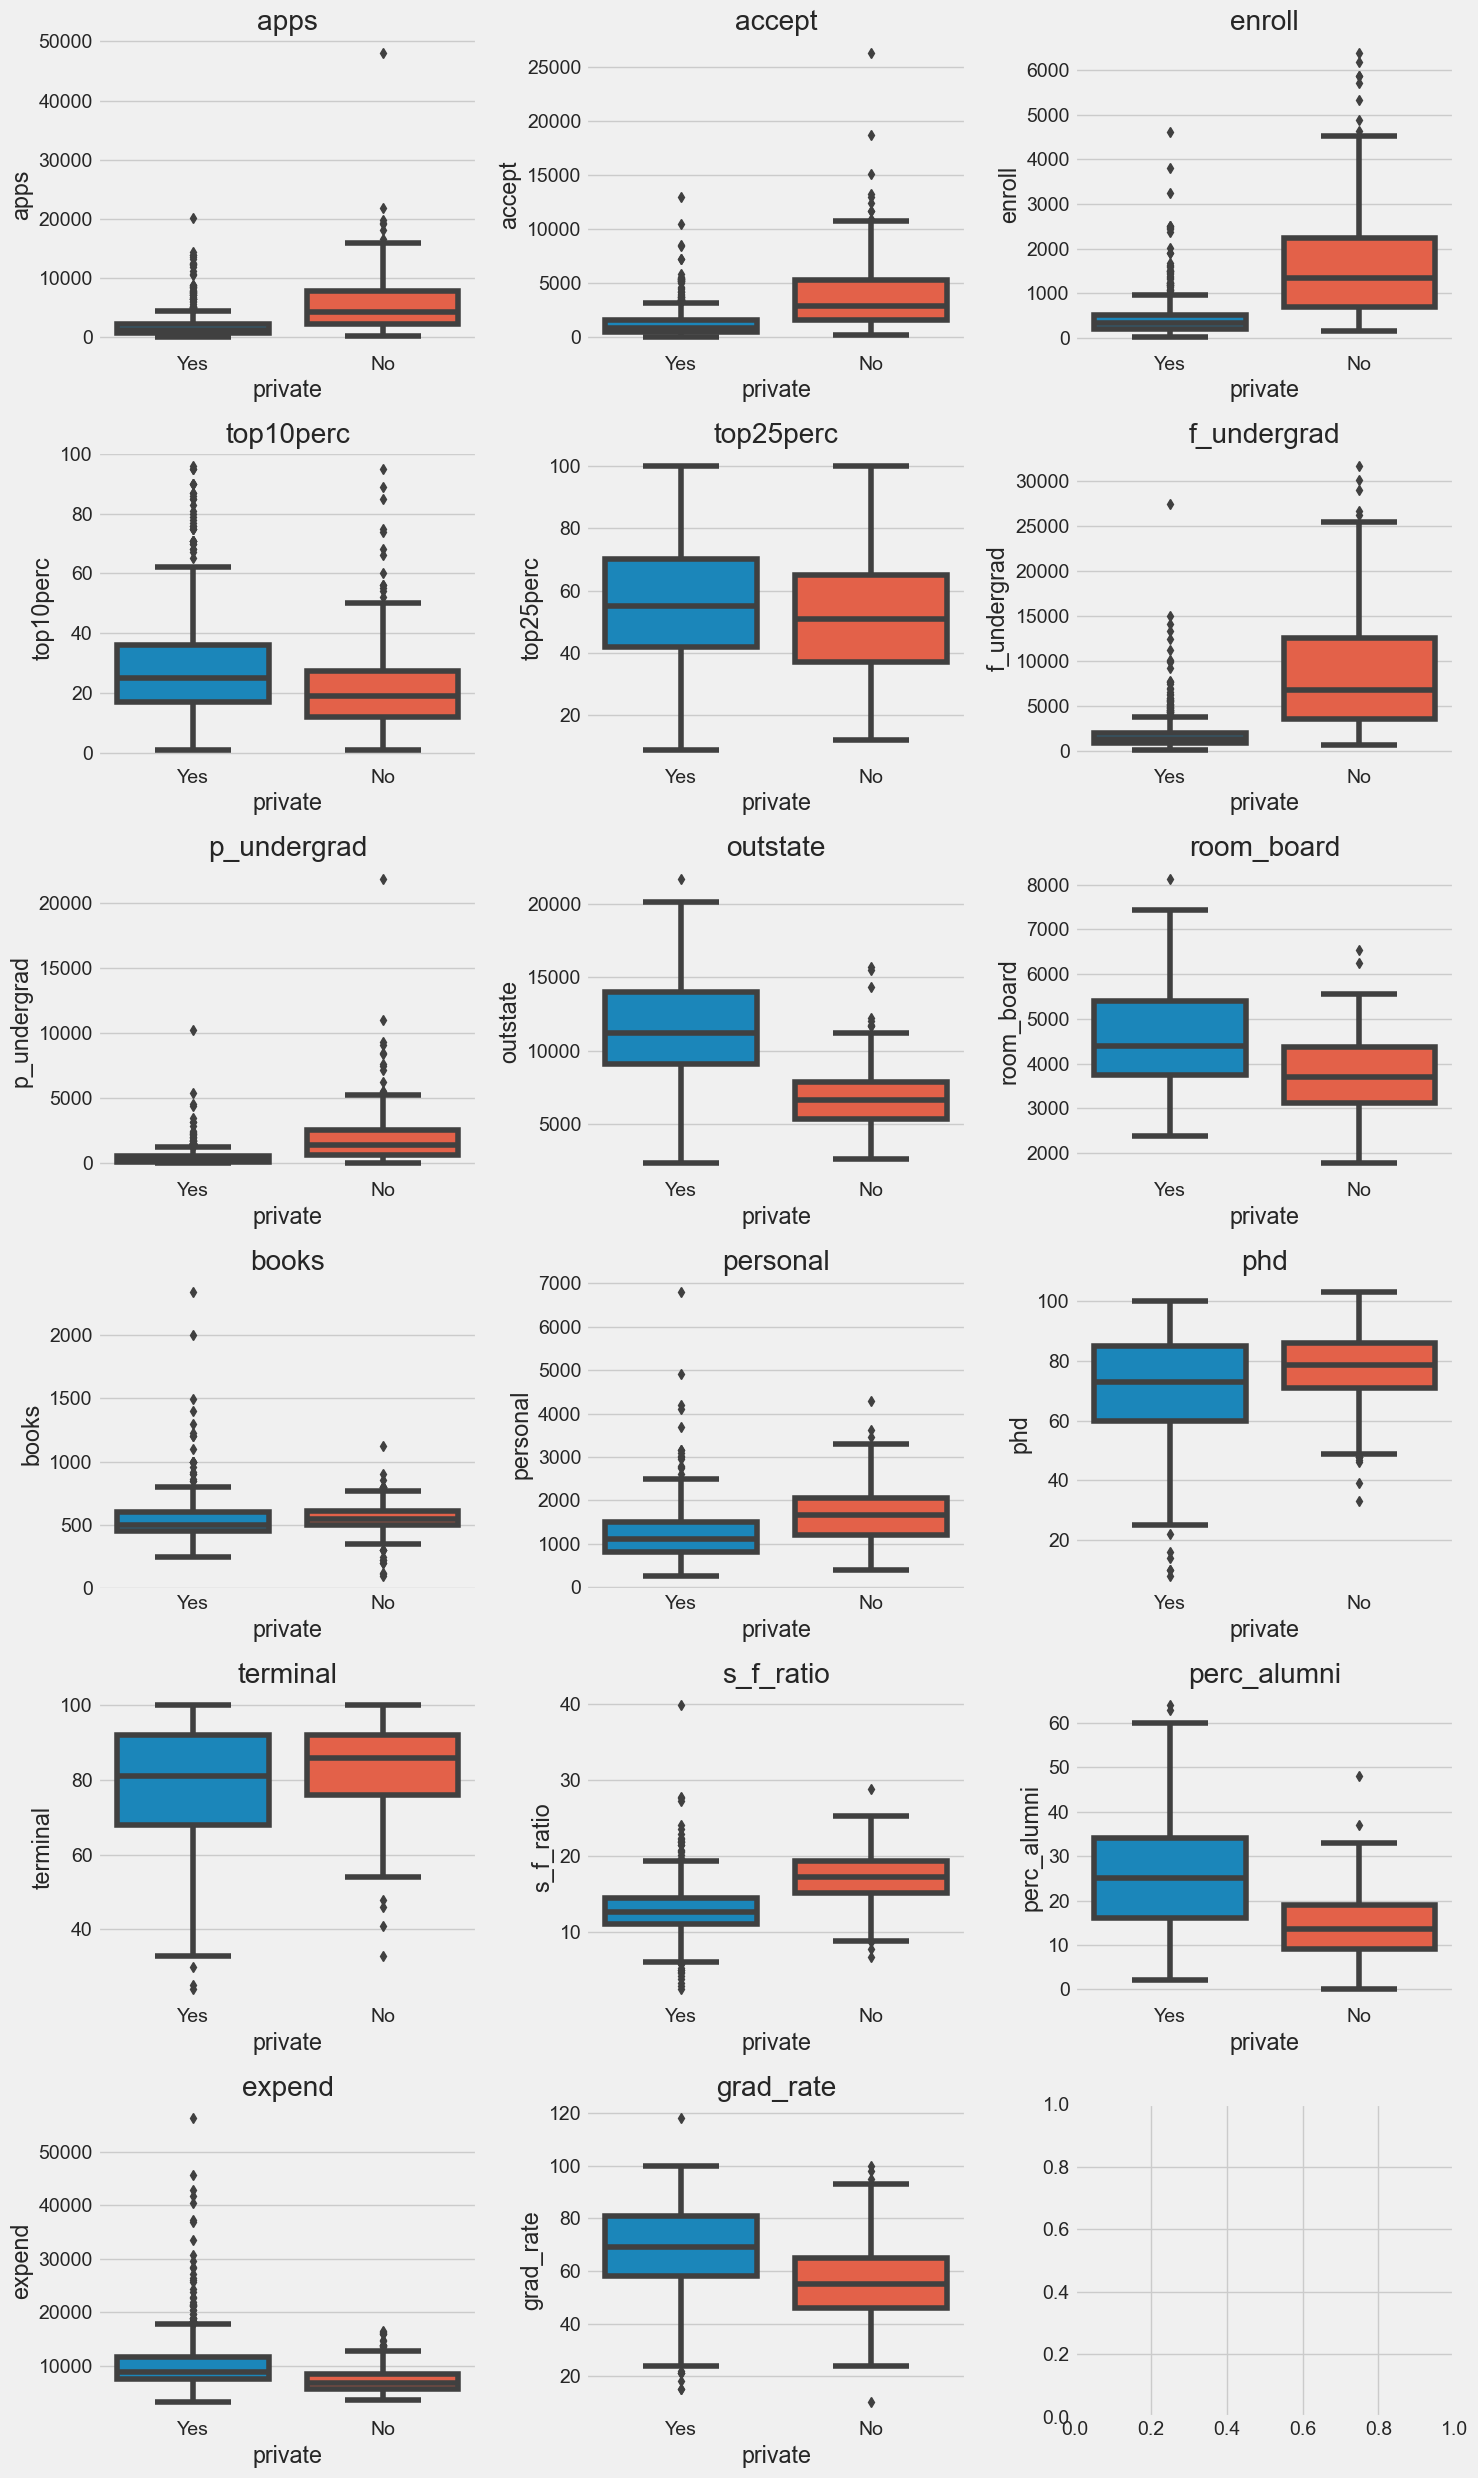

In [9]:
column_name = full_data[features].columns

# Define the number of plots in each row
plots_per_row = 3
num_rows = (len(column_name) // plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=plots_per_row, figsize=(15, num_rows*5))
axes = axes.flatten()

# Popular subplots
for i, feature in enumerate(column_name):
    ax = axes[i]
    sns.boxplot(x=TARGET, y=feature, data=full_data, ax=ax)
    ax.set_title(feature)

plt.tight_layout()
plt.show()

### Corrlation Map

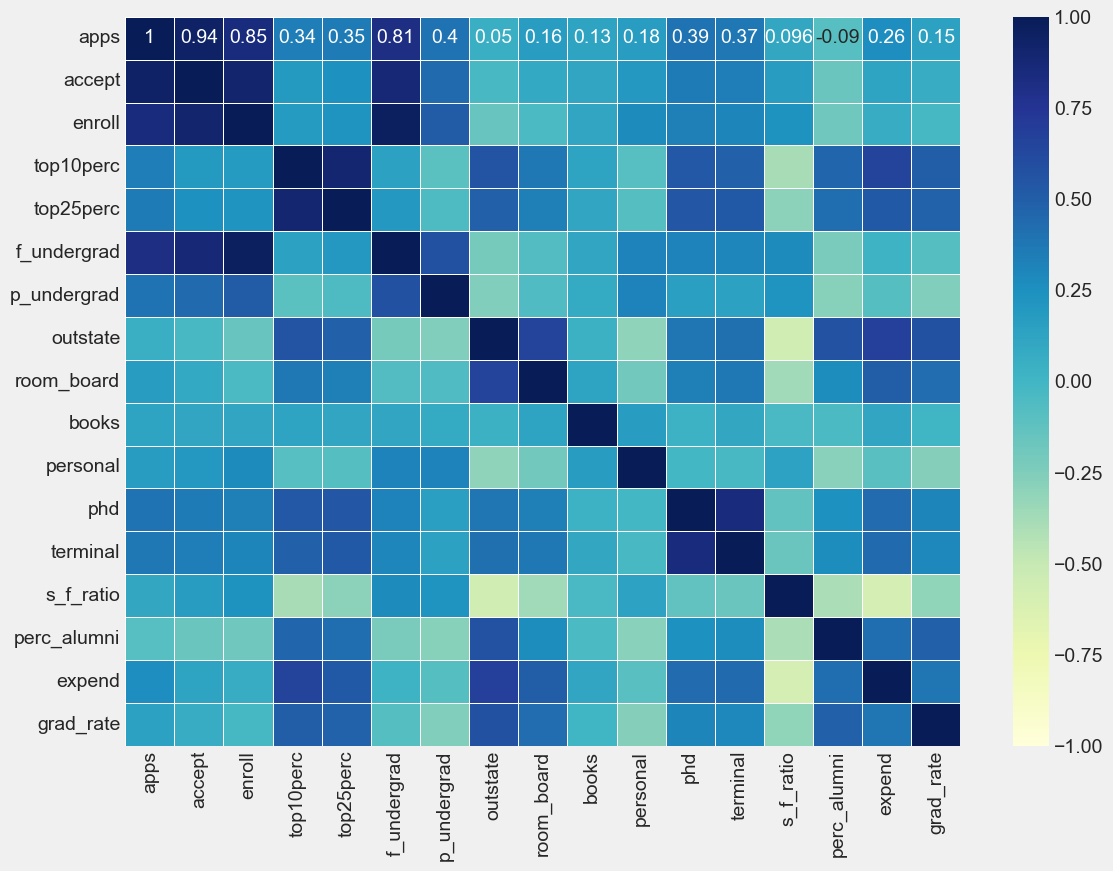

In [10]:
plt.figure(figsize=(12, 9))
sns.heatmap(full_data[features].corr(), vmin=-1, vmax=1, linewidths=0.5, cmap='YlGnBu', annot=True)
plt.show()

In [11]:
full_data[features].corr()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
f_undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
p_undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
room_board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


## 3) Visualisation de grad_rate par rapport à room_board

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


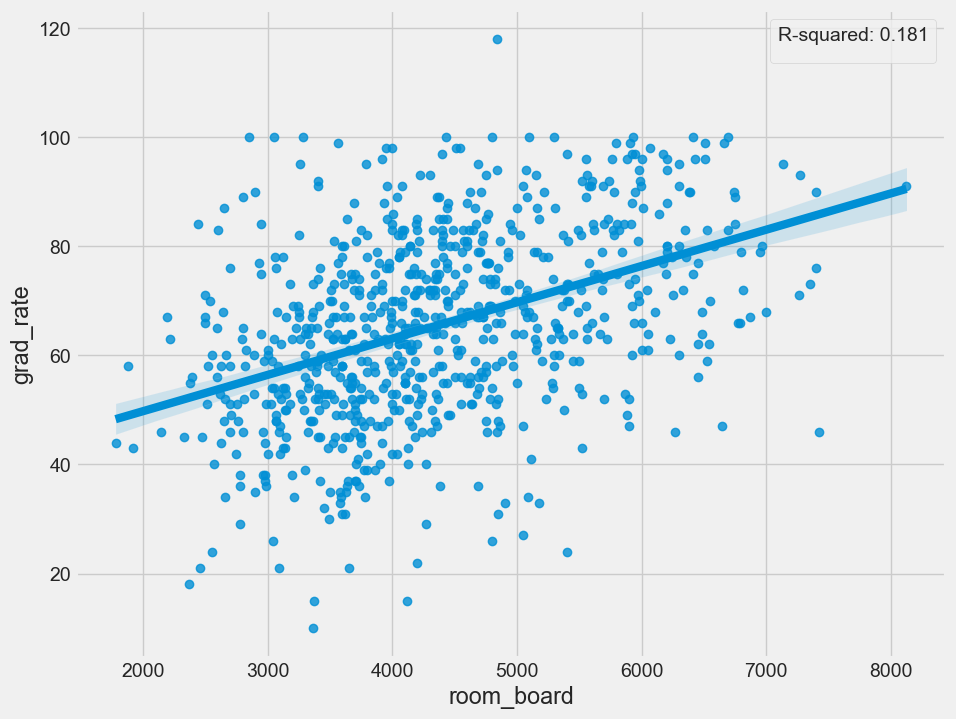

In [12]:
plt.figure(figsize=(10, 8))
sns.regplot(x="room_board", y="grad_rate", data=full_data)

slope, intercept, r_value, p_value, sdt_err = linregress(full_data["room_board"], full_data["grad_rate"])
r_squared = r_value**2

plt.legend(title=f"R-squared: {r_squared:.3f}")
plt.show()

## 4) Visualisation sur le plan de f_undergrade et de outstate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


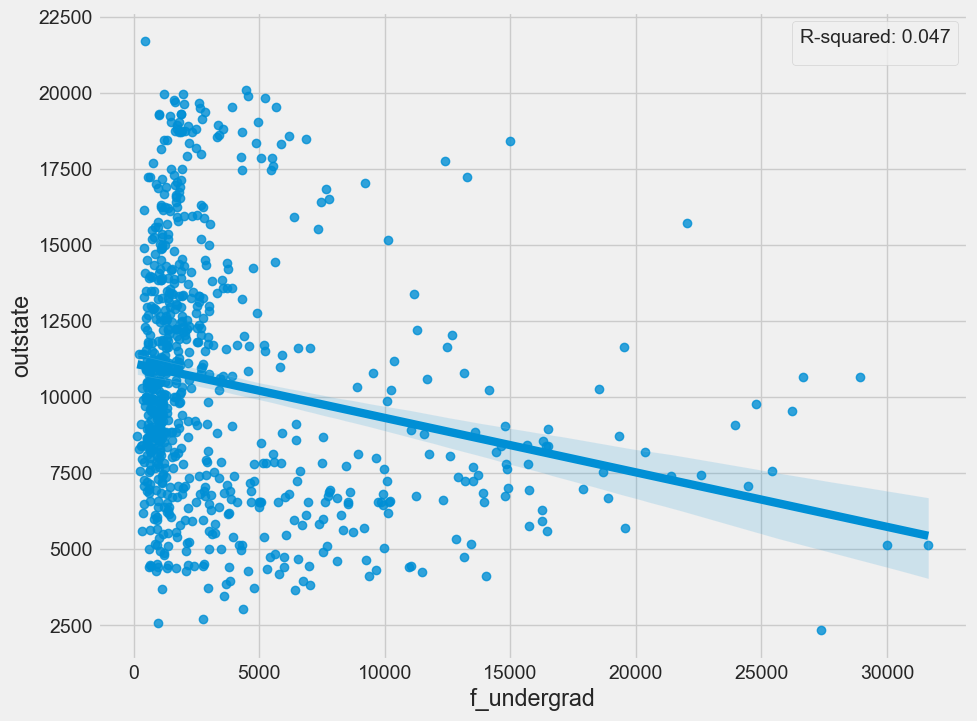

In [13]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'f_undergrad', y = 'outstate', data = full_data)

# Calcul du coefficient de determination
slope, intercept, r_value, p_value, std_err = linregress(full_data["f_undergrad"], full_data["outstate"])
r_squared = r_value**2

plt.legend(title=f'R-squared: {r_squared:.3f}')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = full_data.drop(TARGET, axis=1)
Y = full_data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((621, 17), (156, 17), (621,), (156,))

In [16]:
X_train.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
739,1164,1062,478,12,25,2138,227,4470,2890,600,1210,33,33,16.3,10,4249,60
133,983,664,249,23,57,1698,894,9990,5666,800,1500,66,71,14.3,28,6084,64
234,780,628,198,7,20,545,42,11750,2700,400,850,77,83,14.0,24,6475,76
55,500,336,156,25,55,421,27,6500,2700,500,1000,76,76,14.3,53,8377,51
639,1458,874,588,56,86,1846,154,9843,3180,600,1500,74,78,14.6,16,6716,51


## 6) Standardiser les variables, faites la prédiction et l'évaluation de KNN

### a) transformation logarithmique

In [17]:
X_train = np.log1p(X_train)
Y_train = np.log1p(X_test)

In [18]:
X_train.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
739,7.060476,6.968850,6.171701,2.564949,3.258097,7.668094,5.429346,8.405367,7.969358,6.398595,7.099202,3.526361,3.526361,2.850707,2.397895,8.354674,4.110874
133,6.891626,6.499787,5.521461,3.178054,4.060443,7.437795,6.796824,9.209440,8.642415,6.685861,7.313887,4.204693,4.276666,2.727853,3.367296,8.713582,4.174387
234,6.660575,6.444131,5.293305,2.079442,3.044522,6.302619,3.761200,9.371694,7.901377,5.993961,6.746412,4.356709,4.430817,2.708050,3.218876,8.775858,4.343805
55,6.216606,5.820083,5.056246,3.258097,4.025352,6.045005,3.332205,8.779711,7.901377,6.216606,6.908755,4.343805,4.343805,2.727853,3.988984,9.033365,3.951244
639,7.285507,6.774224,6.378426,4.043051,4.465908,7.521318,5.043425,9.194617,8.064951,6.398595,7.313887,4.317488,4.369448,2.747271,2.833213,8.812397,3.951244


### b) Valeur aberrantes

In [19]:
# ! pip install datasist

In [20]:
from datasist.structdata import detect_outliers

def detectOutliers(dataframe, features):
    outliers_indices = detect_outliers(dataframe, features=features, n=0)
    number_of_outliers = len(outliers_indices)
    return number_of_outliers

print(f"Le nombre d'outliers avant transformation dans le train set est de : {detectOutliers(X_train, features)}")
print(f"Le nombre d'outliers avant transformation dans le test set est de: {detectOutliers(X_test, features)}")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.fit_transform(X_test[features])

print(f"Le nombre d'outliers après transformation dans le train set est de : {detectOutliers(X_train, features)}")
print(f"Le nombre d'outliers après transformation dans le test set est de: {detectOutliers(X_test, features)}")

Le nombre d'outliers avant transformation dans le train set est de : 114
Le nombre d'outliers avant transformation dans le test set est de: 50
Le nombre d'outliers après transformation dans le train set est de : 114
Le nombre d'outliers après transformation dans le test set est de: 50


### d) Entrainement, Prédiction et Evaluation

0.7756410256410257


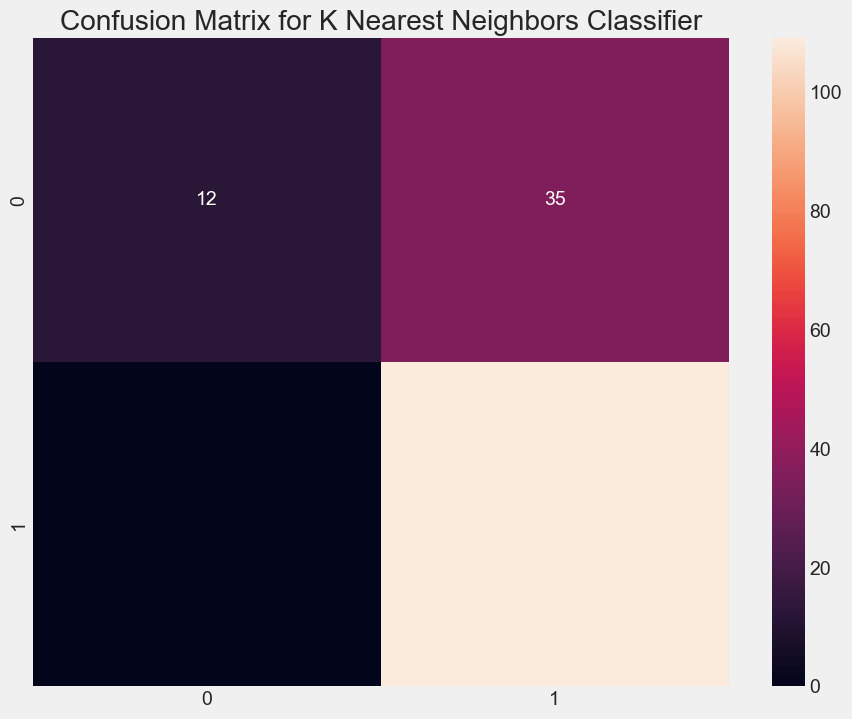

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix for K Nearest Neighbors Classifier')
sns.heatmap(cm, annot = True)

ACCURACY_SCORE     =     accuracy_score(y_test, preds)
print(ACCURACY_SCORE)

In [25]:
display(pd.DataFrame(preds))

,0
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
151,Yes
152,Yes
153,No
154,No
